# Homework of Finite Difference Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## HW_01

**Lemma 5.2** (Spectral norm inequality). 

*Let $A > cI$, $c > 0$. Then the spectral norm
$|A^{−1}| < c^{−1}$.*

### 证明

我们给出不同于论文上的一个几何证明

我们先明确**谱范数**是什么

$|A|=\max_{|x|=1}{|Ax|}$

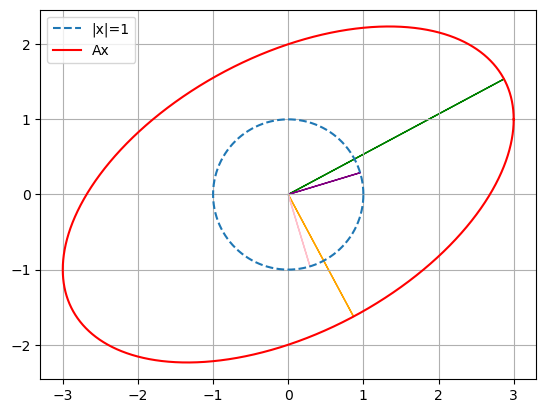

In [2]:
A = np.array([
    [3, 0],
    [1, 2],
])

t = np.linspace(0, 2*np.pi, 10000)
x = np.array([
    np.cos(t), np.sin(t)
])
plt.plot(x[0], x[1], '--')
y = A @ x
plt.plot(y[0], y[1], 'r')

l = np.sqrt(y[0]**2+y[1]**2)
i, s = np.argmin(l), np.argmax(l)
ui, us = y[:,i], y[:,s]
plt.arrow(0, 0, ui[0], ui[1], color='orange')
plt.arrow(0, 0, us[0], us[1], color='green')

vi, vs = x[:,i], x[:,s]
plt.arrow(0, 0, vi[0], vi[1], color='pink')
plt.arrow(0, 0, vs[0], vs[1], color='purple')


plt.axis("equal")
plt.grid()
plt.legend(['|x|=1', 'Ax'])

### 奇异值分解

$x^Tx=1, |Ax|$ 的极值点也就是 $|Ax|^2=x^TA^TAx$ 的极值点

那么，由Lagrange乘数法定理，极值点满足，存在一个$\lambda$使得
$$ \dfrac{\partial}{\partial{x}}(x^TA^TAx-\lambda x^Tx)=0 $$

根据矩阵微分法则
$$ LHS=2(A^TAx-\lambda x) $$
因此，$x$ 是对称矩阵 $A^TA$ 的特征向量，我们选择$n$个单位正交的列向量组成 $V=(v_i)_{i\le n}$
我们有
$$ \langle Av_i,Av_j\rangle=v_i^TA^TAv_j = \lambda_jv_i^Tv_j = 0 $$
故 $AV$ 的列正交，将其单位化我们有
$$ AV=U\Sigma $$
其中$\Sigma$是正的对角矩阵，$U$是单位正交方阵，即
$$A=U\Sigma V^T$$
由于 $|Av_j|^2=v_j^TA^TAv_j = \lambda_j $,
故 $\sigma_j=\sqrt{\lambda_j}$

以上，我们重新发现一遍矩阵的**奇异值分解**，并且我们已经清楚
$$|A|=\max{\sigma_i}$$
那么我们立刻得到
$$ |A^{-1}|=|V\Sigma^{-1}U^T|=\max \sigma_i^{-1} $$

### 命题证明

我们现在来考虑给出的条件 $A>cI$，即对于任意 $x^Tx=1$，有
$$x^TAx>c$$
这意味着，
$$c<\langle x,Ax\rangle=\langle x,U\Sigma V^Tx\rangle $$
令 $y=V^Tx$，则有
$$ c<\langle Vy,U\Sigma y\rangle, \forall |y|=1 $$
我们令 $y=e_j$，则有
$$ c<\langle v_j, \sigma_j u_j\rangle <\sigma_j $$
故 $\sigma^{-1} <c^{-1} $，则
$$ |A^{-1}|=\max \sigma_i^{-1}<c^{-1} $$


### 小结

事实上，从几何角度观察与代数证明相互印证，我们想要证明
$$ |A|=\max \sigma_i=\sqrt{\rho(A^TA)}>c $$
就是要证明 $A^TA>c^2I$
那么余下的代数技巧就是显而易见，且恰好符合条件的

## HW_02

用 $\delta$ 函数法求四阶导算子矩阵$A$（大小$N\times N$）的逆
$$
A=
\begin{bmatrix}
6 & -4 & 1 \\
-4 & 6 & -4 & 1 \\
1 & -4 & 6 & -4 & 1 \\
& 1 & -4 & 6 & -4 & 1 \\
&& \ddots \\
&&& 1 & -4 & 6 & -4 & 1 \\
&&&& 1 & -4 & 6 & -4  \\
&&&&& 1 & -4 & 6  \\
\end{bmatrix}
$$

In [3]:
# 我们先上点科技
N = 7
A = 6*np.eye(N) + -4*(np.eye(N,k=-1)+np.eye(N,k=1)) + np.eye(N,k=-2)+np.eye(N,k=2)

A

array([[ 6., -4.,  1.,  0.,  0.,  0.,  0.],
       [-4.,  6., -4.,  1.,  0.,  0.,  0.],
       [ 1., -4.,  6., -4.,  1.,  0.,  0.],
       [ 0.,  1., -4.,  6., -4.,  1.,  0.],
       [ 0.,  0.,  1., -4.,  6., -4.,  1.],
       [ 0.,  0.,  0.,  1., -4.,  6., -4.],
       [ 0.,  0.,  0.,  0.,  1., -4.,  6.]])

解方程
$$ AB_j = E_j, j=0,\cdots,N-1 $$
$$ B_j = [b_{0,j}, b_{1,j}, \cdots, b_{N-2,j}, b_{N-1,j}]^T $$

但我们从线性系统的角度来看，$A$ 作用到列向量 $X$ 上相当于
一个信号 
$$[\cdots, 0, 0, x_0, x_1, \cdots, x_{N-2}, x_{N-1}, 0, 0, \cdots]$$
经过一个系统 $h[n]$，
其中
$$[h_{-2}, h_{-1}, h_0, h_1, h_2]=[1, -4, 6, -4, 1]$$

用卷积表示就是
$$ x[n] * h[n] = e[n] $$

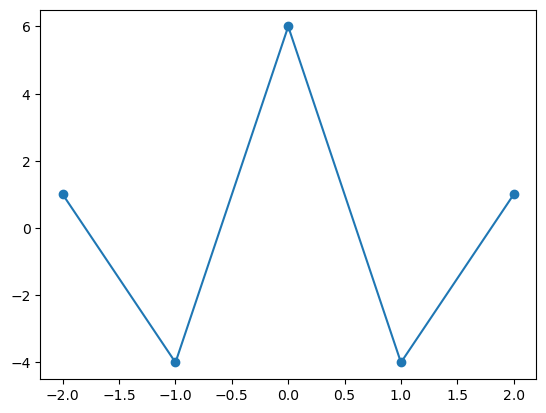

In [4]:
plt.plot(range(-2, 3), [1, -4, 6, -4, 1], '-o')

### 我们先用z变换法（母函数法）

$H$ 经过 $z-$变换为
$$ z^2-4z+6-4z^{-1}+z^{-2}=\dfrac{(1-z)^4}{z^2} $$
而 $\delta[i-j]$ 的 $z-$ 变换为 $z^{j}$
所以原信号的 $z-$变换为
$$ \dfrac{z^{j+2}}{(1-z)^4} $$
所以输出 $\delta[n-j]$ 的原信号的一个特解是
$$\cdots, x_j=x_{j+1}=0, x_{j+2}=\dfrac{3\cdot2\cdot1}{3!}, x_{j+3}=\dfrac{4\cdot3\cdot2}{3!}, x_{j+4}=\dfrac{5\cdot4\cdot3}{3!}, \cdots$$

而系统 $H$ 的齐次解为
$$ x_n=c_0+c_1\dfrac{n}{1!}+c_2\dfrac{n(n+1)}{2!}+c_3\dfrac{n(n+1)(n+2)}{3!} $$

因此特解和齐次解待定系数，解出满足边界条件的输入信号，即
$$
\begin{cases}
0= x[-2] = c_0-2c_1+c_2 \\
0= x[-1] = c_0 -c_1 \\
0= x[N] = \dfrac{(N-j+1)(N-j)(N-j-1)}{3!} + c_0+c_1N+c_2\dfrac{N(N+1)}{2!}+c_3\dfrac{N(N+1)(N+2)}{3!}   \\
0= x[N+1] = \dfrac{(N-j+2)(N-j+1)(N-j)}{3!} + c_0+c_1(N+1)+c_2\dfrac{(N+1)(N+2)}{2!}+c_3\dfrac{(N+1)(N+2)(N+3)}{3!}   \\
\end{cases}
$$
解上述方程得

In [5]:
from sympy import *

n, N, j = symbols("n, N, j")

M = Matrix([
    [(N+1)*(N+2)/2, N*(N+1)*(N+2)/6], 
    [(N+2)*(N+3)/2, (N+1)*(N+2)*(N+3)/6], 
])
M

Matrix([
[(N + 1)*(N + 2)/2,       N*(N + 1)*(N + 2)/6],
[(N + 2)*(N + 3)/2, (N + 1)*(N + 2)*(N + 3)/6]])

In [6]:
B = -Matrix([(N-j+1)*(N-j)*(N-j-1)/6, (N-j+2)*(N-j+1)*(N-j)/6])
B

Matrix([
[-(N - j)*(N - j - 1)*(N - j + 1)/6],
[-(N - j)*(N - j + 1)*(N - j + 2)/6]])

In [7]:
C = M**(-1)*B
C

Matrix([
[N*(N - j)*(N - j + 1)*(N - j + 2)/(3*(N**2 + 5*N + 6)) - (N - j)*(N - j - 1)*(N - j + 1)/(3*(N + 2))],
[ (N - j)*(N - j - 1)*(N - j + 1)/(N**2 + 3*N + 2) - (N - j)*(N - j + 1)*(N - j + 2)/(N**2 + 5*N + 6)]])

In [8]:
X = (n-j+1)*(n-j)*(n-j-1)/6
X

(-j + n)*(-j + n - 1)*(-j + n + 1)/6

In [9]:
Y = Matrix([[(n+1)*(n+2)/2, n*(n+1)*(n+2)/6]])*C
Y=Y[0,0].factor()
Y

-(-N + j)*(n + 1)*(n + 2)*(-N + j - 1)*(-3*N*j + N*n - 3*N + 2*j*n - 3*j + 5*n - 3)/(6*(N + 1)*(N + 2)*(N + 3))

In [10]:
(X+Y).factor()

-(-N + n)*(j + 1)*(j + 2)*(-N + n - 1)*(N*j - 3*N*n - 3*N + 2*j*n + 5*j - 3*n - 3)/(6*(N + 1)*(N + 2)*(N + 3))

In [11]:
def Inv4(k:int):
    res = np.ones([k, k])
    for l in range(k):
        for i in range(k):
            if i<l:
                res[i,l] = Y.subs({N:k, j:l, n:i})
            else:
                res[i,l] = (X+Y).subs({N:k, j:l, n:i})

    return res

In [12]:
Inv4(7)

array([[0.62222222, 0.93333333, 1.        , 0.88888889, 0.66666667,
        0.4       , 0.15555556],
       [0.93333333, 1.98333333, 2.33333333, 2.16666667, 1.66666667,
        1.01666667, 0.4       ],
       [1.        , 2.33333333, 3.33333333, 3.33333333, 2.66666667,
        1.66666667, 0.66666667],
       [0.88888889, 2.16666667, 3.33333333, 3.88888889, 3.33333333,
        2.16666667, 0.88888889],
       [0.66666667, 1.66666667, 2.66666667, 3.33333333, 3.33333333,
        2.33333333, 1.        ],
       [0.4       , 1.01666667, 1.66666667, 2.16666667, 2.33333333,
        1.98333333, 0.93333333],
       [0.15555556, 0.4       , 0.66666667, 0.88888889, 1.        ,
        0.93333333, 0.62222222]])

In [16]:
k = 10
A = 6*np.eye(k) + -4*(np.eye(k,k=-1)+np.eye(k,k=1)) + np.eye(k,k=-2)+np.eye(k,k=2)

A
(Inv4(k)@A).round(10)

array([[ 1., -0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.],
       [-0.,  1., -0.,  0., -0.,  0., -0.,  0.,  0., -0.],
       [-0., -0.,  1.,  0., -0.,  0., -0.,  0.,  0.,  0.],
       [-0.,  0., -0.,  1.,  0., -0.,  0., -0., -0.,  0.],
       [ 0., -0., -0.,  0.,  1.,  0., -0.,  0.,  0., -0.],
       [-0.,  0.,  0., -0.,  0.,  1.,  0., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -0.,  0.,  1., -0.,  0.,  0.],
       [ 0., -0.,  0., -0.,  0., -0.,  0.,  1.,  0.,  0.],
       [-0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  1.,  0.],
       [ 0., -0.,  0.,  0., -0.,  0., -0., -0., -0.,  1.]])

In [14]:
print(latex(Y))
print(latex((X+Y).factor()))


- \frac{\left(- N + j\right) \left(n + 1\right) \left(n + 2\right) \left(- N + j - 1\right) \left(- 3 N j + N n - 3 N + 2 j n - 3 j + 5 n - 3\right)}{6 \left(N + 1\right) \left(N + 2\right) \left(N + 3\right)}
- \frac{\left(- N + n\right) \left(j + 1\right) \left(j + 2\right) \left(- N + n - 1\right) \left(N j - 3 N n - 3 N + 2 j n + 5 j - 3 n - 3\right)}{6 \left(N + 1\right) \left(N + 2\right) \left(N + 3\right)}


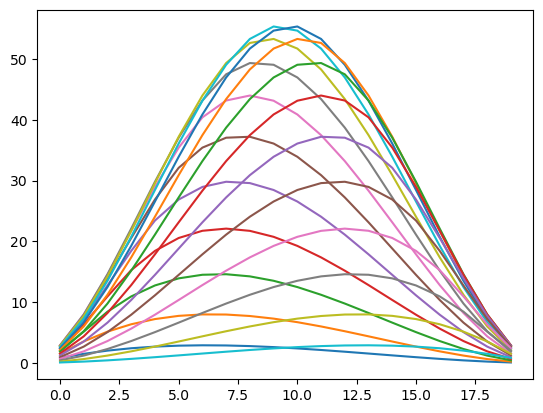

In [15]:
plt.plot(Inv4(20))

因此我们给出 $A^{-1}$ 为
$$
a_{n,j}=
\begin{cases}
\frac{\left(- N + j\right) \left(n + 1\right) \left(n + 2\right) \left(- N + j - 1\right) \left(- 3 N j + N n - 3 N + 2 j n - 3 j + 5 n - 3\right)}{6 \left(N + 1\right) \left(N + 2\right) \left(N + 3\right)}, &n<j  \\
\frac{\left(- N + n\right) \left(j + 1\right) \left(j + 2\right) \left(- N + n - 1\right) \left(N j - 3 N n - 3 N + 2 j n + 5 j - 3 n - 3\right)}{6 \left(N + 1\right) \left(N + 2\right) \left(N + 3\right)}, &n\ge j   \\
\end{cases}
$$

## HW03

参见
I Boundary Value Problems and Iterative Methods\02 Steady States\note.ipynb
2.16.3


## HW04

参见
I Boundary Value Problems and Iterative Methods\04 Iterative Methods for Sparse Linear Systems\note.ipynb
4.4